### Introduction

The project we are going to describe in the following lines, it is related with the market for the auctions of repossesed assets. Data is exposed in a public web from the government
This document is to draft some initial analysis on the dataset for the auctions to get a better understanding on the data we have but also to explain some of the methods we used for data extraction, processiong, etc.

#### Some thoughts

Initially we set our expectations quite high with regards to the amount of new data to be ready to be scraped from the auction site. Turns out we deeply overestimated this.
Initially expectation was set at around 6000-10000 records per week. At the moment we estimate around 800-1200 per week.


In [1]:
# Imports
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constants
ROOT_DIR = os.getcwd()
PATH_TO_CSVS = os.path.join(ROOT_DIR, "results/csv")

The following is an example on how the data looks like.

In this case, it is a JSON file for a single auction item.

In [3]:
path_to_example = os.path.join(ROOT_DIR, "results/details/SUB-AT-2018-18R4586001028.json")

with open(path_to_example) as file:
    jsonData = json.load(file)

print(json.dumps(jsonData, indent=4, sort_keys=True)) 

{
    "autoridad_gestora": {
        "codigo": "R45860",
        "correo_electronico": "subastas.castillalamancha@correo.aeat.es",
        "descripcion": "U.R. SUBASTAS CASTILLA-MANCHA (AEAT)",
        "direccion": "PZ TENDILLAS 1 ; 45002 TOLEDO",
        "fax": "-",
        "telefono": "925287719"
    },
    "bienes": {
        "cargas": "0,00 \u20ac",
        "codigo_postal": "02002",
        "descripcion": "URBANA. GARAJE EN CALLE ANGEL, N\u00ba 19, PLANTA BAJA, SUPERFICIE UTIL, 10,13 M2. CUOTA DE PARTICIPACI\u00d3N DE UN ENTERO Y SEIS CENTESIMAS POR CIENTO.",
        "direccion": "CL ANGEL 19 0",
        "idufir": "02011000745776",
        "inscripcion_registral": "BIEN INSCRITO EN REGISTRO N\u00daM. 4 DE ALBACETE TOMO: 2373 , FOLIO: 191 , LIBRO: 681. FINCA: 36248 , INSCRIPCI\u00d3N: 1",
        "localidad": "ALBACETE",
        "provincia": "Albacete",
        "referencia_catastral": "9961014WJ9196B0019UA",
        "situacion_posesoria": "No consta",
        "titulo_juridico": "PLE

In [7]:
def loading_auction_data(filename, path=PATH_TO_CSVS):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

auctions = loading_auction_data("allAuctions1.csv")
auctions.head(10)

,subId,estimatedValue,debtAmount,independentValuation,longitude,latitude,maxBid
0,SUB-AT-2018-18R4586001028,12181.52,NaN,12181.52,-1.852563,38.987367,9000.0
1,SUB-AT-2018-18R4586001048,4576.13,NaN,4576.13,-4.105331,38.691151,1000.0
2,SUB-AT-2018-18R4686001043,7353.38,NaN,7353.38,-0.179937,38.974495,2500.0
3,SUB-AT-2018-18R4686001051,7353.38,NaN,7353.38,-0.179937,38.974495,3500.0
4,SUB-AT-2019-18R2886001150,7125.00,NaN,7125.00,-3.510454,40.429053,4000.0
5,SUB-AT-2019-18R2986001186,36262.40,NaN,36262.40,-4.541814,37.359843,16000.0
6,SUB-AT-2019-18R4686001213,8984.52,NaN,8984.52,-0.172911,38.992762,3000.0
7,SUB-AT-2019-19R0686001032,220080.00,NaN,220080.00,-3.710512,40.430454,382000.0
8,SUB-AT-2019-19R0886001022,374573.44,NaN,522241.43,2.071422,41.527668,294000.0
9,SUB-AT-2019-19R0886001080,312777.95,NaN,312777.95,1.337282,41.623367,142000.0


In [8]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8608 entries, 0 to 8607
Data columns (total 7 columns):
subId                   8608 non-null object
estimatedValue          8608 non-null float64
debtAmount              8068 non-null float64
independentValuation    8608 non-null float64
longitude               8361 non-null float64
latitude                8361 non-null float64
maxBid                  8608 non-null float64
dtypes: float64(6), object(1)
memory usage: 470.9+ KB


In [9]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8608 entries, 0 to 8607
Data columns (total 7 columns):
subId                   8608 non-null object
estimatedValue          8608 non-null float64
debtAmount              8068 non-null float64
independentValuation    8608 non-null float64
longitude               8361 non-null float64
latitude                8361 non-null float64
maxBid                  8608 non-null float64
dtypes: float64(6), object(1)
memory usage: 470.9+ KB


In [10]:
percentage_with_debt_amount = round(7985/8512 * 100, 2)

print(f'\nFor the current file, we have {percentage_with_debt_amount}% of samples with the amount of debt provided(claimable by debtor)\n')



For the current file, we have 93.81% of samples with the amount of debt provided(claimable by debtor)



In [11]:
auctions.describe().apply(lambda s: s.apply(lambda x: '%.3f' % x))


,estimatedValue,debtAmount,independentValuation,longitude,latitude,maxBid
count,8608.000,8068.000,8608.000,8361.000,8361.000,8608.000
mean,319296.266,394750.441,136561.798,-3.360,39.090,127470.220
std,2167273.812,5491128.314,2106269.634,5.587,3.466,364756.723
min,0.000,0.000,0.000,-90.126,26.687,0.000
25%,61515.812,29810.365,0.000,-4.831,37.729,10359.225
50%,152481.500,91031.240,0.000,-3.640,40.074,67776.955
75%,270982.238,177564.985,40049.448,-0.185,41.370,137437.515
max,180000000.000,366426481.750,180000000.000,4.287,43.752,12737000.000


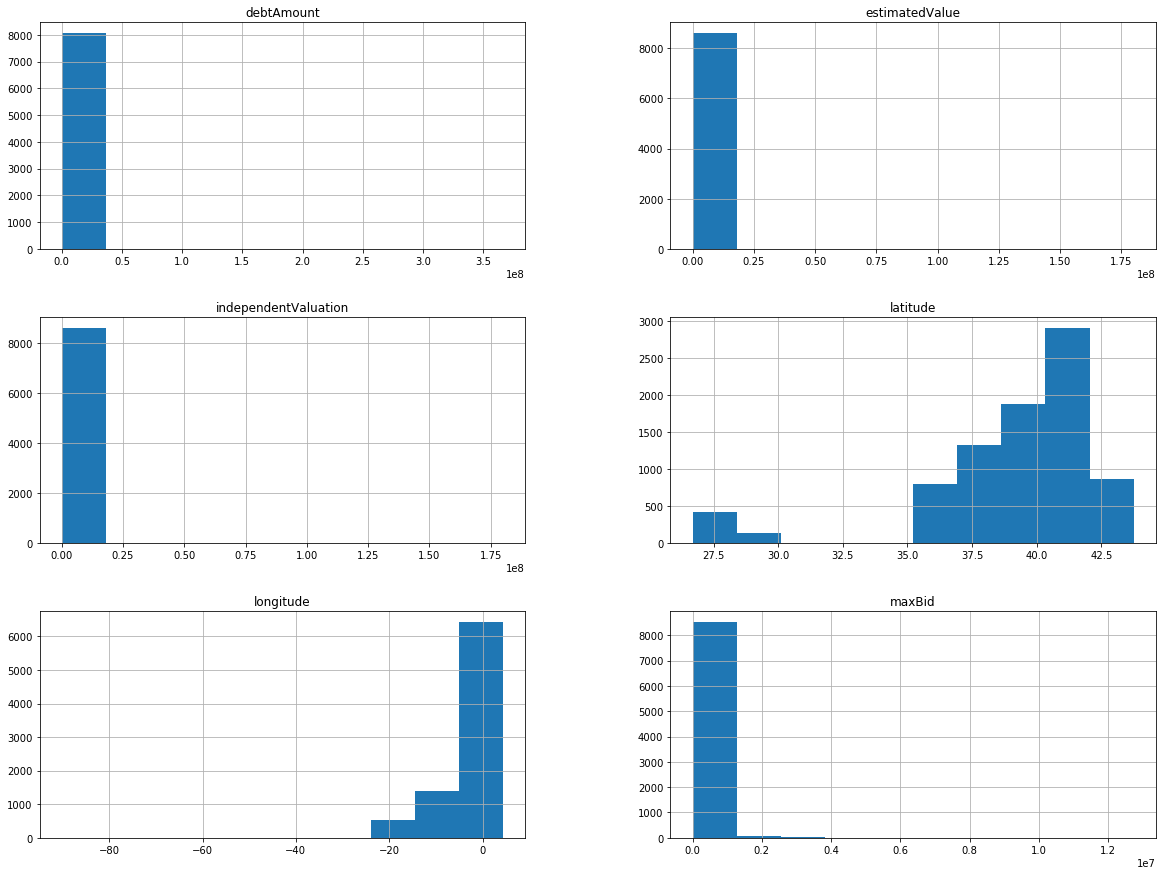

In [12]:
%matplotlib inline

auctions.hist(bins=10, figsize=(20,15))
plt.show()


No handles with labels found to put in legend.


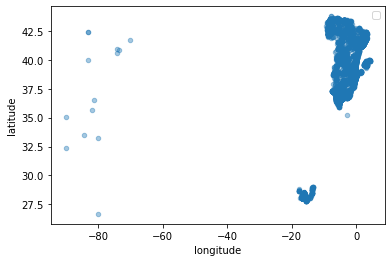

In [16]:
auctions.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.legend()

##### Some observations

Seems we have the case of heavy tailing in most of the features. Concretely, has a high positive skewness.

Regarding the Postal Code, might be interesting to turn it into longitute and latitude with a 3 decimal precission for both of them. This way we can turn it effectively into a continuous variable.

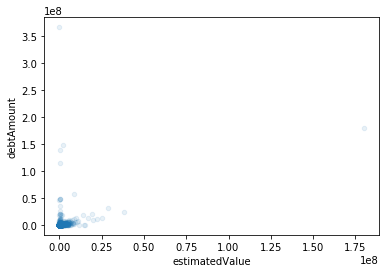

In [13]:
auctions.plot(kind="scatter", x="estimatedValue", y="debtAmount", alpha=0.1)

In [107]:
estimatedValues = auctions["estimatedValue"]
debtAmounts = auctions["debtAmount"]

count_with_value_estimation = 0
count_with_debt_amount = 0

for e in estimatedValues:
    if e != 0:
        count_with_debt_amount += 1

for e in debtAmounts:
    if e != 0:
        count_with_value_estimation += 1


print(f'This many samples with provided data for "debtAmount": {count_with_debt_amount}\n')

print(f'This many samples with provided data for "estimatedValue": {count_with_value_estimation}\n')

This many samples with provided data for "debtAmount": 8494

This many samples with provided data for "estimatedValue": 8340



In [114]:
auctions["estimatedValue"].value_counts()

10000.0

In [186]:
ranges = [
    0,
    10000,
    30000,
    50000,
    100000,
    150000,
    200000,
    250000,
    300000,
    400000,
    500000,
    750000,
    1000000,
    1500000,
]

def distribution_with_given_ranges(feature, ranges):

    distribution_by_ranges = {}

    counter=0    

    for e in feature:
        counter += 1
        for r_idx in range(0, len(ranges)):

            if (r_idx == len(ranges)-1 and int(e) >= ranges[r_idx]):
                key = f'+{ranges[r_idx]}'
                distribution_by_ranges[key] = distribution_by_ranges.get(key, 0) + 1
                break
            if (int(e) in range(ranges[r_idx], ranges[r_idx + 1])):
                key = f'{ranges[r_idx]}-{ranges[r_idx + 1]}'
                distribution_by_ranges[key] = distribution_by_ranges.get(key, 0) + 1
                break
    return distribution_by_ranges
        
print(distribution_with_given_ranges(auctions["estimatedValue"], ranges))


{'10000-30000': 709, '0-10000': 760, '30000-50000': 396, '200000-250000': 888, '300000-400000': 684, '50000-100000': 1170, '150000-200000': 1034, '750000-1000000': 125, '100000-150000': 1131, '+1500000': 223, '250000-300000': 626, '500000-750000': 326, '1000000-1500000': 131, '400000-500000': 309}


In [187]:
auctions["estimatedValue"].skew()

70.73160540465118

### Some observations on the previous data

Turns out the data it's strongly skewed (positive skew). The purpose of this analysis, is detecting patterns in the auctions to use that intelligence to predict interesting auctions in the future.
Given the outliers will be far from our reach in economic terms, the option choosen to get a more normal distribution would be to simply remove those outliers.
Same will be done for the elements with a valuation of 0 given this is one of the most important properties in our dataset.

<em>**Clarification**: We are talking about repossessed assets with valuations of 2/3 million +. Given that an average person doesn't use all his capital for this type of business, makes sense the decision of removing those elements falling above this threshold.</em>

In [260]:
UPPER_THRESSHOLD = 1500000
DEBT_RATIO_UPPER_THRESHOLD = 5

auctions_copy = auctions.copy()

auctions_copy.drop(
    auctions_copy[
        (auctions_copy["estimatedValue"] > UPPER_THRESSHOLD) |
        (auctions_copy["estimatedValue"] == 0) |
        (np.isnan(auctions_copy["debtAmount"]) == True) |
        (auctions_copy["debtAmount"]/auctions_copy["estimatedValue"] > DEBT_RATIO_UPPER_THRESHOLD)
    ].index, inplace=True)

print(len(auctions_copy["estimatedValue"]))
print(len(auctions_copy["debtAmount"]))

7376
7376


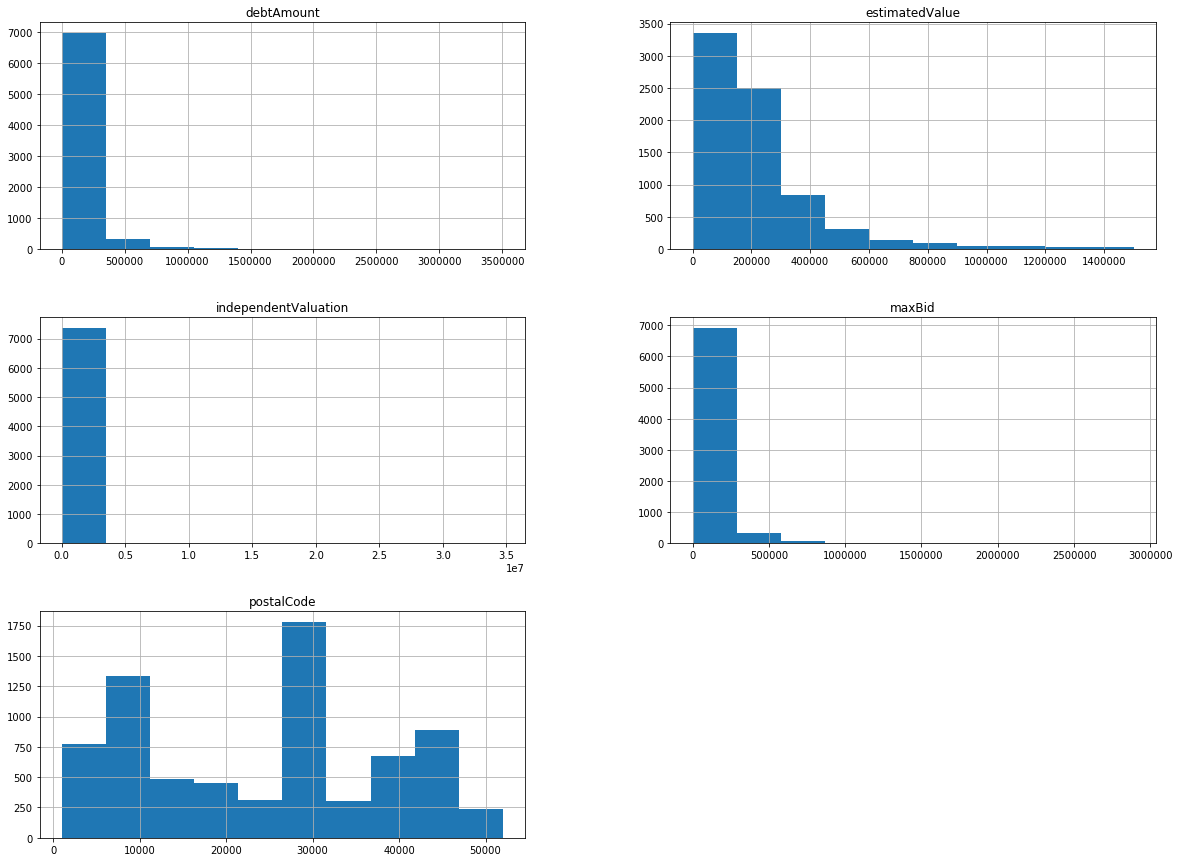

In [261]:
%matplotlib inline

auctions_copy.hist(bins=10, figsize=(20,15))
plt.show()


In [262]:
print(len(auctions_copy["debtAmount"]))


7376
